 # 神经网络拟合线性回归问题
构造满足y=3x+5关系的若干个点，并加入噪音

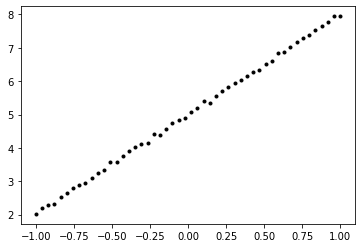

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# 生成x
t_x=np.linspace(-1,1,50,dtype=np.float32)
noise=np.random.normal(0,0.05,t_x.shape)
t_y=3.0*t_x+5.0+noise
plt.plot(t_x,t_y,'k.')
plt.show()

### 构建神经网络
定义神经网络模型，神经网络模型定义可以分四步，构建输入层、隐层、输出层和定义损失函数。

In [11]:
def add_layer(input,in_size,out_size,activation_function):
    Weight=tf.Variable(tf.random_normal([in_size,out_size]))
    biases=tf.Variable(tf.zeros([1,out_size]))
    Wx_plus_b=tf.matmul(input,Weight)+biases
    if activation_function is None:
        outputs=Wx_plus_b
    else:
        outputs=activation_function(Wx_plus_b)
    return outputs

- 输入层用于数据的输入，无需进行操作。
- 隐层用于神经网路中的第一次处理。输入的值为x，维度为1。输出值为神经网络的一次处理结果。假设隐层为10个节点，
则输出值的维度为10，再激活函数上，通常选择ReLU函数。
- 输出层用于神经网络的预测值，输入值为隐层的输出值，数据维度为10，最终的输出数据维度为1，在激活函数的选择
上，不再使用激活函数，直接获取预测值。

在误差损失函数的选择上，使用线性模型的最小化均方误差。


In [12]:
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])
# 构建隐层
l1=add_layer(x,1,10,activation_function=tf.nn.relu)
# 构建输出层
predition=add_layer(l1,10,1,activation_function=None)
# 损失函数，reduction_indices表示求和的维度
loss=tf.reduce_mean(tf.reduce_sum(tf.square(y-predition),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

### 进行数据训练
总共训练1000次，每训练50次，输出一次损失值

In [21]:
# 训练模型
t_x=t_x.reshape(50,1)
t_y=t_y.reshape(50,1)
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train_step,feed_dict={x:t_x,y:t_y})
        if (i+1)%50==0:
            print(i,sess.run(loss,feed_dict={x:t_x,y:t_y}))

49 0.011305768
99 0.0026493454
149 0.002083589
199 0.002023399
249 0.002001237
299 0.00198337
349 0.001967737
399 0.0019479941
449 0.0019287257
499 0.0019208076
549 0.001916038
599 0.0019116581
649 0.0019075902
699 0.0019037944
749 0.0019002281
799 0.0018968788
849 0.0018937141
899 0.001890723
949 0.0018878813
999 0.0018851849
